In [1]:

!unzip '/content/drive/MyDrive/Crime classification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [3]:
train_dir = "/content/Train"
test_dir = "/content/Test"

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 5
LR =  0.00003

In [4]:
crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


In [5]:
crimes={}
train=test=0
for clss in crime_types:
    num=len(os.listdir(os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir(os.path.join(test_dir,clss)))
    
    crimes[clss]=num

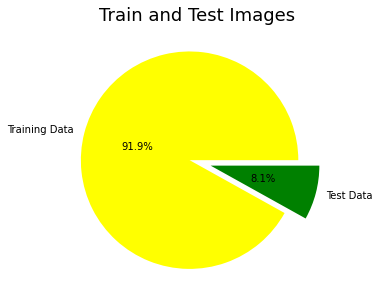

In [6]:
plt.figure(figsize=(8, 5))
plt.pie(x=np.array([train,test]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5,colors=['yellow','green'])
plt.title("Train and Test Images ", fontsize=18);

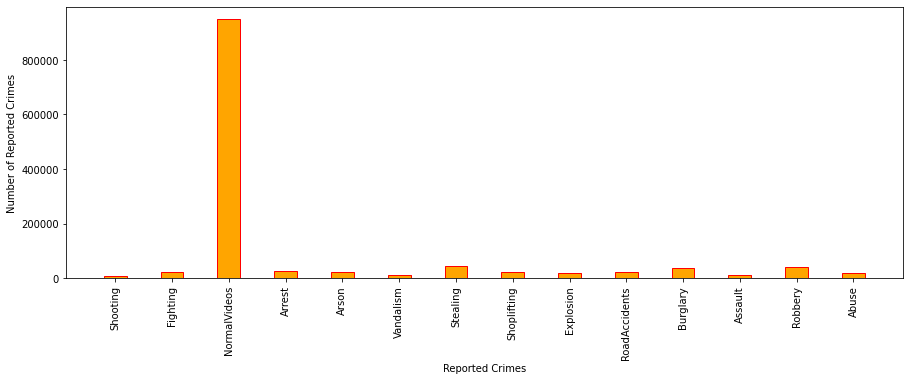

In [7]:
plt.figure(figsize=(15,5))
plt.bar(list(crimes.keys()), list(crimes.values()), width=0.4,align="center",edgecolor=['red'],color=['orange'])
plt.xticks(rotation=90)

plt.xlabel("Reported Crimes")
plt.ylabel("Number of Reported Crimes")
plt.show()

In [8]:
IMG_WIDTH=64
IMG_HEIGHT=64

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [9]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)


Found 1266345 files belonging to 14 classes.
Using 1013076 files for training.


In [10]:

val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)


Found 1266345 files belonging to 14 classes.
Using 253269 files for validation.


In [11]:
test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 111308 files belonging to 14 classes.


In [12]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")
    
    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False
    
    for layers in base_model.layers[thr:]:
        layers.trainable=True
    
    return base_model

In [13]:
def create_model():
    model=Sequential()
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(n,activation="softmax"))
    
    model.summary()
    
    return model

In [14]:
model=create_model()

model.compile(optimizer="adam", 
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

In [15]:
history = model.fit(x = train_set,validation_data=val_set,epochs = EPOCHS)

Epoch 1/5
15830/15830 [==============================] - 2087s 128ms/step - loss: 0.1006 - accuracy: 0.9743 - val_loss: 0.0336 - val_accuracy: 0.9914
Epoch 2/5
15830/15830 [==============================] - 1980s 125ms/step - loss: 0.0317 - accuracy: 0.9926 - val_loss: 0.0183 - val_accuracy: 0.9955
Epoch 3/5
15830/15830 [==============================] - 1974s 125ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.0130 - val_accuracy: 0.9967
Epoch 4/5
15830/15830 [==============================] - 1948s 123ms/step - loss: 0.0360 - accuracy: 0.9955 - val_loss: 0.0117 - val_accuracy: 0.9970
Epoch 5/5
15830/15830 [==============================] - 1956s 124ms/step - loss: 0.0191 - accuracy: 0.9957 - val_loss: 0.0111 - val_accuracy: 0.9971


In [18]:
# Save model

model.save('crime.h5')

In [19]:
from tensorflow.keras.models import load_model
model.load_weights('crime.h5')

In [20]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [21]:
y_pred=model.predict(test_set)

1740/1740 [==============================] - 73s 41ms/step


In [22]:
y_pred

array([[1.00531941e-02, 2.54366943e-03, 1.84361171e-02, ...,
        1.00231964e-05, 1.97222400e-02, 6.45347595e-01],
       [7.53778443e-02, 5.60272066e-03, 3.45034897e-02, ...,
        1.63718229e-04, 2.73587462e-02, 1.59289882e-01],
       [1.24778524e-01, 6.47322694e-03, 7.46720582e-02, ...,
        2.63582479e-04, 4.20531929e-02, 7.23239258e-02],
       ...,
       [3.19747585e-14, 1.28280470e-10, 2.38090082e-12, ...,
        7.77799214e-11, 3.01882170e-14, 1.33224670e-12],
       [1.09919358e-17, 1.39252501e-13, 2.05030974e-15, ...,
        1.38552012e-13, 2.26329354e-17, 1.20349554e-15],
       [5.20700427e-11, 6.42459099e-08, 1.29908462e-09, ...,
        1.83945499e-08, 3.26007589e-11, 1.52069113e-09]], dtype=float32)

In [23]:
y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [58]:
# Testing 1

img = image.load_img('/content/Test/RoadAccidents/RoadAccidents001_x264_0.png',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Burglary','Explosion','Robbery','Abuse','Shooting','Shoplifting','RoadAccidents'] # Creating list
op[pred]  # List indexing with output

1/1 [==============================] - 0s 55ms/step


'RoadAccidents'

In [57]:
# Testing 2

img = image.load_img('/content/Test/Shoplifting/Shoplifting001_x264_0.png',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Burglary','Explosion','Robbery','Abuse','Shooting','Shoplifting','RoadAccidents'] # Creating list
op[pred]  # List indexing with output

1/1 [==============================] - 0s 34ms/step


'Shoplifting'

In [56]:
# Testing 3

img = image.load_img('/content/Test/Explosion/Explosion002_x264_0.png',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Burglary','Explosion','Robbery','Abuse','Shooting','Shoplifting','RoadAccidents'] # Creating list
op[pred]  # List indexing with output

1/1 [==============================] - 0s 35ms/step


'Explosion'

In [55]:
# Testing 4

img = image.load_img('/content/Test/Burglary/Burglary005_x264_0.png',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Burglary','Explosion','Robbery','Abuse','Shooting','Shoplifting','RoadAccidents'] # Creating list
op[pred]  # List indexing with output

1/1 [==============================] - 0s 52ms/step


'Burglary'

In [54]:
# Testing 5

img = image.load_img('/content/Test/Robbery/Robbery048_x264_0.png',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Burglary','Explosion','Robbery','Abuse','Shooting','Shoplifting','RoadAccidents'] # Creating list
op[pred]  # List indexing with output

1/1 [==============================] - 0s 57ms/step


'Robbery'